<img src="https://www.universidades.com.ec/logos/original/logo-universidad-politecnica-salesiana.png" style="margin: 0 auto"/>

<h1 style="text-align:center;color: darkblue">Desarrollo de un modelo de Regresión para predecir el número de casos confirmados de personas con COVID-19</h1>

<ul style="text-align:center;list-style:none">
    <li><strong>Autor: </strong> Bryam David Vega Moreno</li>
    <li><strong>Maestro: </strong> Diego Quisi</li>
    <li><strong>Materia: </strong> Simulación</li>
    <li><strong>Universidad: </strong> Universidad Politécnica Salesiana</li>
    <li><strong>Carrera: </strong> Ciencias de la computación</li>
</ul>

-----------------------------

<h2 style="color:yellowgreen">Introducción</h2>

<p style='text-align:justify'>Actualmente, el covid se ha vuelto uno de los virus más trascendentales a nivel mundial, perjudicando económicamente a los paises, ademas de ello afecto en gran medida a los sistemas de salud que no estaban preparados para un virus como este. En nuestro específico, en Ecuador se ha desatado una creciente ola de contagios desde que inicio el virus, en donde hospitales estan al máximo de su capacidad y la mayoria de ellos no pueden atender a más personas. En este ocasión proponemos un modelo de regresión que nos permite predecir el número de personas que existiran en un determiado día, con la finalidad de poder tener un número cercano para estar preparados para lo que pueda pasar.</p>

---------------

<h2 style="color:yellowgreen">Desarrollo del modelo de regresión</h2>

 <h3 style="color:red">Librerias a importar</h3>

##### Librerias para la lectura y el análisis de datos

In [175]:
import pandas as pd
import numpy as np

from datetime import datetime, timedelta

##### Librerías para realizar procesos de transformación y división de datos

In [2]:
from sklearn.model_selection import train_test_split

##### Librerias para realizar el proceso de regresión

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

##### Librerias para realizar las gráficas

In [4]:
import altair as alt
import matplotlib.pyplot as plt

 <h3 style="color:red">Dataset</h3>

Para este análisis hemos preparado un dataset denominado **covid.csv** el cual es un dataset que tuvo un proceso de transformación mediante otros csv y se concentro la información para tener los datos de nuestro país que en este caso es Ecuador. El dataset contiene la siguiente información:

<ul>
    <li><strong>date:</strong> Fecha en la que se obtiene los datos</li>
    <li><strong>death:</strong> Número de personas fallecidas por el virus</li>
    <li><strong>confirmed:</strong> Número de personas con el virus</li>
    <li><strong>recovered:</strong> Número de personas recuperadas con el virus</li>
    <li><strong>day:</strong> Número del dīa de la pandemia a partir del 1/01/2020</li>
</ul>

In [5]:
df = pd.read_csv('./in/covid.csv')
df.sample(5)

,date,confirmed,deaths,recovered,day
252,2020-11-08,174907,12830,154956,312
202,2020-09-19,125620,11084,97063,262
140,2020-07-19,74013,5313,31901,200
291,2020-12-17,204249,13932,177951,351
23,2020-03-24,1082,27,3,83


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       409 non-null    object
 1   confirmed  409 non-null    int64 
 2   deaths     409 non-null    int64 
 3   recovered  409 non-null    int64 
 4   day        409 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.1+ KB


 <h3 style="color:red">Convertir datos para realizar un análisis exploratorio</h3>

Un paso muy importante para realizar los modelos es realizar un análisis con el fin de ver como se esta comportando la data, en esta ocasión procedemos a hacer un proceso de transformación rápido para poder trabajar con el tipo de datos correctos

In [7]:
df_copy = df.copy(deep=True)
df_copy = df_copy.convert_dtypes()
df_copy['date'] = pd.to_datetime(df_copy['date'])

In [8]:
df_copy.sample(5)

,date,confirmed,deaths,recovered,day
253,2020-11-09,175269,12839,154956,313
33,2020-04-03,3368,145,65,93
281,2020-12-07,198244,13780,174188,341
81,2020-05-21,35306,2939,3557,141
87,2020-05-27,38103,3275,18425,147


In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       409 non-null    datetime64[ns]
 1   confirmed  409 non-null    Int64         
 2   deaths     409 non-null    Int64         
 3   recovered  409 non-null    Int64         
 4   day        409 non-null    Int64         
dtypes: Int64(4), datetime64[ns](1)
memory usage: 17.7 KB


Ya con estos datos transformados, procedemos a realizar un análisis exploratorio para ver como se estan comportando nuestros datos

-----------------------------

 <h3 style="color:red">Análisis exploratorio</h3>

In [10]:
df_time = df_copy.set_index(['date'])
df_time.drop('day',axis=1,inplace=True)

 <h3 style="color:orange">Como se comportan los datos en corte de cada mes</h3>

In [11]:
df_time=df_time.resample('M').sum()

In [12]:
df_time

,confirmed,deaths,recovered
date,,,
2020-03-31,16469,423,84
2020-04-30,321161,12586,23439
2020-05-31,1029314,76863,210913
2020-06-30,1429745,118831,702114
2020-07-31,2217004,160481,978383
2020-08-31,3121790,189640,2521381
2020-09-30,3678159,304684,3008490
2020-10-31,4714534,379203,4009025
2020-11-30,5411330,390757,4740172


 <h3 style="color:orange">Personas que estan en tratamiento</h3>

In [13]:
df_treatment = df_time['confirmed']-df_time['deaths']-df_time['recovered']

In [14]:
df_treatment

date
2020-03-31      15962
2020-04-30     285136
2020-05-31     741538
2020-06-30     608800
2020-07-31    1078140
2020-08-31     410769
2020-09-30     364985
2020-10-31     326306
2020-11-30     280401
2020-12-31     371836
2021-01-31     596115
2021-02-28     709772
2021-03-31     823829
2021-04-30     437323
Freq: M, dtype: Int64

 <h3 style="color:orange">Número de contagios, muetras, recuperaciones se da entre meses</h3>

In [15]:
df_diff = df_time.diff()

In [16]:
df_diff=df_diff.fillna(df_time.head(1).to_dict())

In [17]:
df_diff

,confirmed,deaths,recovered
date,,,
2020-03-31,16469,423,84
2020-04-30,304692,12163,23355
2020-05-31,708153,64277,187474
2020-06-30,400431,41968,491201
2020-07-31,787259,41650,276269
2020-08-31,904786,29159,1542998
2020-09-30,556369,115044,487109
2020-10-31,1036375,74519,1000535
2020-11-30,696796,11554,731147


 <h3 style="color:orange">Promedio de contiagios,muertes,recuperados</h3>

In [18]:
df_diff.mean()

confirmed    315429.642857
deaths        15872.142857
recovered    268320.142857
dtype: float64

 <h3 style="color:orange">Gráficas</h3>

En esta gráfica estamos mostrante el comportamiento de los datos a lo largo del tiempo, como podemos apreciar, el número de confirmados recuperados tiene una tendencia paralela,es decir, a medida que se van confirmando casos, podriamos decir que una gran mayoria de ellas se recupera, mientras que el resto pueda estar en tratamiento o fallecido

In [20]:
alt.Chart(df_time.reset_index().melt('date')).mark_line().encode(
    x='date',
    y='value',
    color='variable'
).interactive()

alt.Chart(...)

En esta gráfica mostramos el porcentaeje de personas recuperadas, fallecidas y en tratamiento, como podemos darnos cuente en la gráfica, podemos darnos cuenta que el número de personas con tratamiento va disminuyendo a medida que se va aumentando el número de personas recuperadas lo cual tiene sentido

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feb6df327f0>,
      dtype=object)

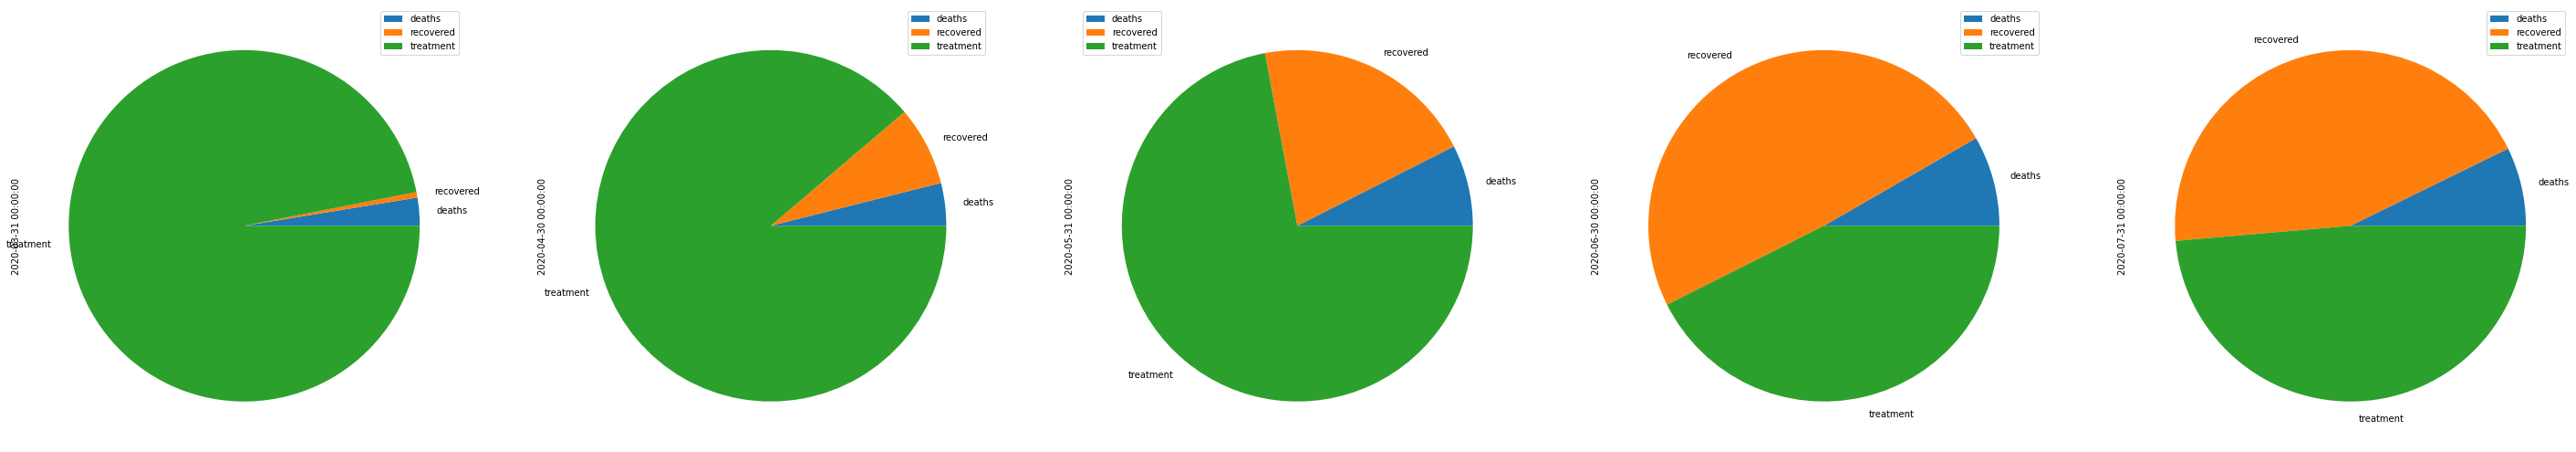

In [21]:
df_time['treatment'] = df_time['confirmed']-df_time['deaths']-df_time['recovered']
df_time[['deaths','recovered','treatment']].T.iloc[:,:5].plot(figsize = (50,10),kind='pie',subplots=True)

Un análisis muy bueno seria ver la velocidad con la que el virus se propaga a lo largo del tiempo, esto es importante para ver cual es su frecuencia de velocidad de propagación con el fin de entender como se esta compartando el virus en nuestro país. Como podemos ver en el histograma que presentamos a continuación la velocidad de propagación del virus es alta a medida que avanza el tiempo, lo interesante es darnos cuenta que es un virus muy contagioso por lo que su velocidad de propagación no ha bajado de los 0.90

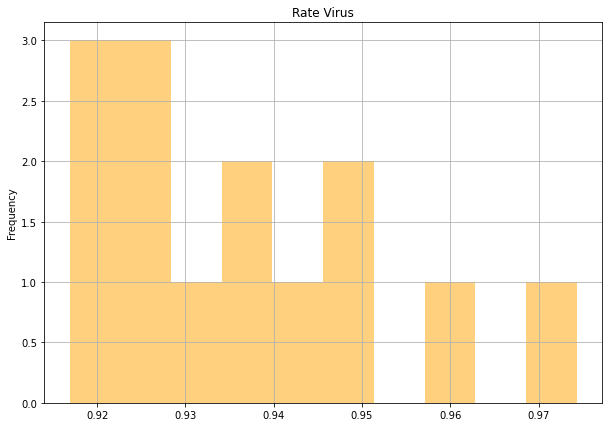

In [22]:
df_time['rate'] = 1 - df_time['deaths']/df_time['confirmed'] 
df_time['rate'].plot(kind='hist',figsize=(10,7),bins=10,color='orange',alpha=0.5,title='Rate Virus',grid=True)

Una vez analizado los datos, procedemos a realizar la creación del modelo con el fin de poder escoger el mejor modelo para este tipo datos

-------------

 <h3 style="color:red">Creación del modelo</h3>

Con el análisis de datos realizado, podemos darnos cuenta que nuestros datos tienen una tendencia a la alza, de manera lineal, por lo tanto un modelo de regresion seria ideal para poder estos datos. Lo primero que procedemos a hacer es obtener nuestro features y targets para poder hacer una división de datos en entrenamiento y test para poder entrenar a nuestro modelo y despues testearlo con los datos de test.

 <h4 style="color:orange">Selección de feautres y target</h4>

En este caso escogimos como features la columna **days** debido a que dicha columna juega el rol más improtante como hemos visto a lo largo del análisis, si bien en el análisis tratamos la columna date, no podemos utilizarla debido a ser un tipo de dato fecha, por lo que el día equivale a la fecha lo cual lo hace el feature más importate. Por otro lado escogimos la columna **confirmed** como nuestro target debido a que eso es lo que deseamos predecir, el número de contagios en un día a futuro

In [23]:
features = df.iloc[:,4:5].values
target = df.iloc[:,1:2].values

 <h4 style="color:orange">División de train y test</h4>

Una vez que ya tenemos nuestro conjunto de datos de entrada y salida, procedemos a dividir dichos datos en train y test a fin de realizar entreamiento con los datos de train y las pruebas con los datos de test, para ello hacemos uso de la libreria **train_test_split**. A continuación mostramos el código para realiarlo

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

Con estos datos dividos procedemos a realizar los modelos de regresión, a continuación procedemos a realizarlos.

 <h4 style="color:orange">Creación de un modelo de regesión</h4>

Como habiamos dicho, nuestros datos tienen una tendencia creciente y lineal, por lo que un modelo de regresión lineal es adecuado para este problema, para ello utilizamos el modelo **LinearRegression** para proceder a hacer nuestro entrenamiento y después las pruebas de nuestro modelo

In [25]:
model_linear = LinearRegression()
model_linear = model_linear.fit(X_train,y_train)

In [26]:
print("Linear Score : ",model_linear.score(X_test,y_test))

Linear Score :  0.9859444494173236


Como podemos apreciar nuestro modelo lineal tiene una score de 0.98 lo cual es alto. Pero, seria mejor ver una gráfica de la misma con el fin de ver si nuestro modelo no tiene problema de overfitting

In [27]:
data_linear=pd.DataFrame({'day':X_test.reshape(-1),'y':y_test.reshape(-1),'y_pred':model_linear.predict(X_test).reshape(-1)})
alt.Chart(data_linear.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

alt.Chart(...)

Como podemos apreciar, nuestro modelo no sufre de overfitting,aunque tenemos la linea la cual se ajusta a los datos correctamente, podemos notar algo interesante, si bien dijimos que tiene una tendencia creciente, podemos notar que nuestro datos tienen una forma polinomial, por lo que agregar un grado polinomial a nuestro modelo de regresión podria ayudar a mejorar nuestro modelo. Por lo que procedemos a realizarlo

In [28]:
model_poly = Pipeline([('poly', PolynomialFeatures(degree=4)),
                         ('linear', LinearRegression(fit_intercept=True))])
model_poly = model_poly.fit(X_train,y_train)

In [29]:
print("Poly Score : ",model_poly.score(X_test,y_test))

Poly Score :  0.9990367771856549


Como podemos notar, nuestro modelo polinomial tiene un mejor score y esto es gracias al comportamiento de nuestros datos, procedemos a graficarlo para ver si no existe un problema de overfitting y mejoramos la curva

In [30]:
data_poly=pd.DataFrame({'day':X_test.reshape(-1),'y':y_test.reshape(-1),'y_pred':model_poly.predict(X_test).reshape(-1)})
alt.Chart(data_poly.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

alt.Chart(...)

Podemos apreciar que realmente no existe problemas de overfitting y que nuestro modelo se ajusta a los datos, es interesante ver como el grado polinomial afecta en gran forma el ajuste a los datos, en este caso podemos decir que nuestro mejor modelo sera el **modelo polinomial**

 <h3 style="color:red">Experimentos</h3>

Una vez analizado nuestros modelos analizamos como se comportaran nuestros modelos con nuevos datos. Vamos a predecir datos para los 10 siguientes días apartir del día 2020-04-14 con la finalidad de ver como se comportan nuestros modelos. El objetivo es hacer notar como el modelo lineal no es tan efectivo que el modelo polinomial como lo vimos en la anterior sección ya que el polinomial se ajusta mejor a nuestros datos 

In [139]:
datos = [i for i in range(469,480)]
predicciones= {'{}'.format(i):[model_linear.predict(np.array(i).reshape(1,-1))[0][0],model_poly.predict(np.array(i).reshape(1,-1))[0][0]] for i in datos}


Una vez realiado las predicciones, realizamos una pequeña tabla, con la finalidad de poder ver de mejor manera las predicciones que obtuvimos y poder notar cual de los dos modelos se comporta mejor con nuevos datos. Procedemos a realizar el nuevo código

In [198]:
inicio = datetime(2020,4,14)
fin    = datetime(2020,4,24)
lista_fechas = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)] 
df_predicciones = pd.DataFrame(predicciones_linear).T
df_predicciones.columns = ['linear','polynomial']
df_predicciones['linear']=df_predicciones['linear'].astype('int')
df_predicciones['polynomial']=df_predicciones['polynomial'].astype('int')
df_predicciones['date']=lista_fechas


In [199]:
df_predicciones

,linear,polynomial,date
469,311900,352314,2020-04-14
470,312746,354149,2020-04-15
471,313591,355999,2020-04-16
472,314436,357863,2020-04-17
473,315281,359742,2020-04-18
474,316126,361636,2020-04-19
475,316971,363545,2020-04-20
476,317816,365469,2020-04-21
477,318661,367409,2020-04-22
478,319507,369364,2020-04-23


Como podemos ver en la tabla presentada, nos damos cuenta que el modelo lineal no se ajusta bien con nuevos datos y eso es debido a que no se ajusta a la curva de contagios como habiamos analizado anteriormente para poder realizar el modelo polinomial. Sin embargo, podemos darnos cuenta que el modelo polinomial se ajusta muy bien a los nuevos datos y predice nuevos contagios de manera creciente. Con una gráfica podemos analizar de mejor manera las predicciones realiadas

In [202]:
alt.Chart(df_predicciones.melt('date')).mark_point().encode(
    x='date:N',
    y=alt.Y('value:Q',scale=alt.Scale(domain=(300000,400000))),
    color='variable:N'
).properties(title='linear vs polynomial').interactive()

alt.Chart(...)

Como podemos apreciar en la gráfica presentada, podemos notar como el polinomial predice contagios más altos y que realmente tienen sentido con respecto a los datos que tenemos, mientras que por otro lado, el lienar predice contagios menores apartir de los datos que tenemos causando que sus predicciones no sean acertadas

 <h3 style="color:red">Conclusiones</h3>

A lo largo de este informe hemos podido notar que realizar un análisis es un proceso importante para poder darnos cuenta como se estan comportando nuestro conjunto de datos, de la misma manera revisamos dos tipos de regresiones con el fin de ver cual es modelo que mejor se ajusta a nuestros datos y nos dimos cuenta que el **modelo polinomial** resulto ser el mejor modelo para este caso, **ojo** digo para este caso ya que no siempre sera el mejor, eso dependera de como se comportan los datos y del tratamiento que le demos a los mismos. Ademas de este informe, el cual presenta un análisis de todo lo realizado, se decidio tratar de automatizar dicho modelo, con la finaliadd de utilizarlo en producción cuando sea necesario, para ello creamos un entorno virtual con todas las librerias que se necesitan. Dicho programa automatiza el proceso de carga, transformación de datos, obtención de features, target, obtención del mejor modelo, ademas de ello exporta el modelo para poder ser utiliado en cualquier sitio web. A continuación dejo el comando que se requeire para poder ejecutar dicho programa:

```
python main.py in/covid.csv
```

Con ello ya no solamente pensamos en utilizar el modelo en cuadernos jupyter sino también utilizamos python de una manera más profesional con el fin de mejorar las skills del lenguaje.